<div class="alert alert-block alert-info">
<b>PILOT</b>

Welcome to the PILOT Package Tutorial for scRNA and pathomics Data!

The PILOT (PatIent-Level distances from single-cell genomics and pathomics data with Optimal Transport) package is a powerful toolkit designed to analyze single-cell RNA sequencing (scRNAseq) and pathomics data (extracted morphological features from pathological images). This tutorial will guide you through the functionalities and workflows of the PILOT package, enabling you to leverage its capabilities for comprehensive analysis and interpretation of your complex data.

With PILOT, you can efficiently explore omics and pathomics data, which provides insights into cellular and molecular/structural changes over disease progression. This breakdown allows for a deeper understanding of disease trajectories, leading to valuable discoveries and novel biological insights.

Throughout this tutorial, we will cover the basic usage of the PILOT package, including loading and preprocessing scRNAseq and pathomics data for uncovering trajectories of diseases and also changes over them. We will also explore visualization techniques to gain visual insights into the data.

By the end of this tutorial, you will have a solid foundation in using the PILOT package to unlock the potential of scRNAseq and pathomics data, empowering you to unravel complex biological processes with detail. 
Let's embark on this exciting journey!

Here we show the whole process for applying PILOT to pathomics data using Kidney_IgAN Tubuli and Kidney_IgAN Glomeruli data. Next, we combine these two data sets by catching the trajectory based on the combination and also the histological changes of structures over the trajectory.
    
 
You can find them [here](https://github.com/CostaLab/PILOT/tree/main/Tutorial/Datasets).

</div>

In [1]:
# Import PILOT functionalities
from PILOT import *

# Kidney_IgAN Tubuli

### Reading Anndata
* Using "extract_data_anno_pathomics_from_h5ad" function, first you need to load the object.

In [2]:
adata=load_h5ad('Datasets/Kidney_IgAN_T.h5ad') #First read the object

### Loading the needed parameters from obs of Anndata:
<div class="alert alert-block alert-warning"> PILOT needs to load cell-type/clusters, samples/patients, and status/disease columns from obs level of Anndata. Also, your Anndata should include the morphological features in the obs level.
    
You can set them with the following parameters:
    
adata: loaded Anndata.
    
var_names: a list of names of morphological features (names of variable in obs level)
    
clusters_col: cell_type/clustering column name in observation level of your  Anndata
    
sample_col: samples/patients column name in observation level of your Anndata
    
status: status/disease column name, e.g. control/case
    
</div>

In [4]:
data_tubuli,annot_tubuli,path_to_results=extract_data_anno_pathomics_from_h5ad(adata,var_names=list(adata.var_names),clusters_col='Cell_type',sample_col='sampleID',status='status' ,name_dataset='Kidney_IgAN_T')

### Cluster representations by estimating regularized probability distributions of cell types per sample:
This function computes the proportions of each cells for samples. Only the annot data that includes the cell/clusters, samples and status is sent to this function.

In [5]:
proportions = Cluster_Representations(annot_tubuli) # Regularization

### Calcuating  cost matrix between clusters:
The distances between clusters is computed. annot  and data(includes morphological features) matrices is sent to this function.

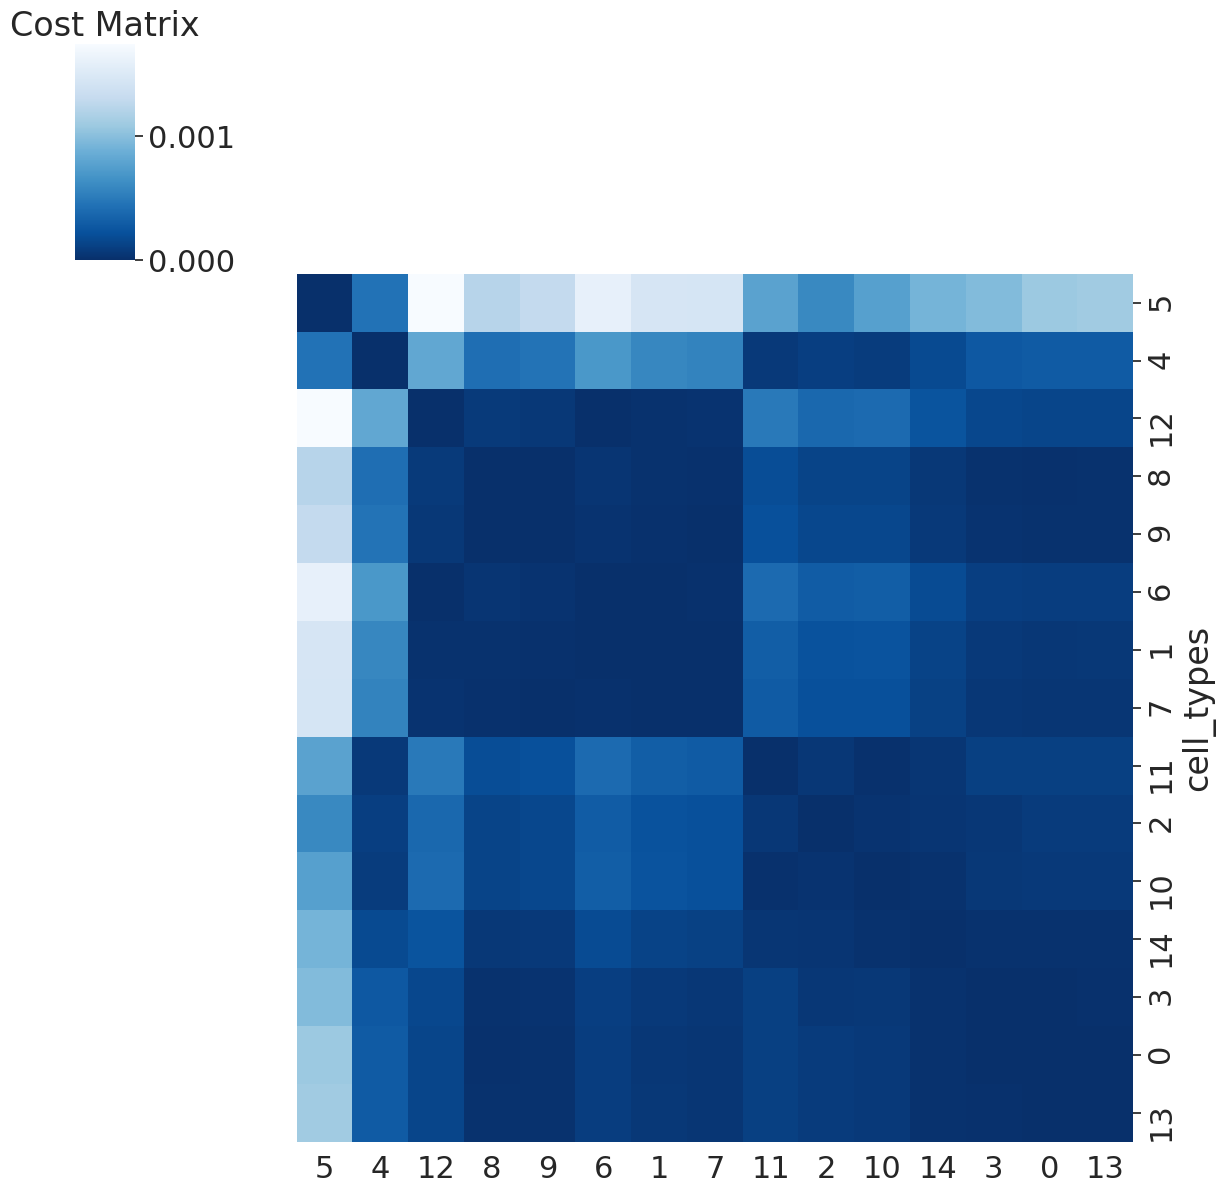

In [6]:
cost= cost_matrix(annot_tubuli, data_tubuli,path_to_results)

### Estimate the Wasserstein distance:
<div class="alert alert-block alert-warning"> 
This function computes the distances among samples based on Wasserstein distance. It needs the proportions of cells for samples and also the cost between cells/clusters. The classical OT here is applied. By changing the regularized parameter (make it reg instead of unreg and also choosing a proper reg (Regularization term), you can swap it with regularized OT (sinkhorn_stabilized).    
</div>

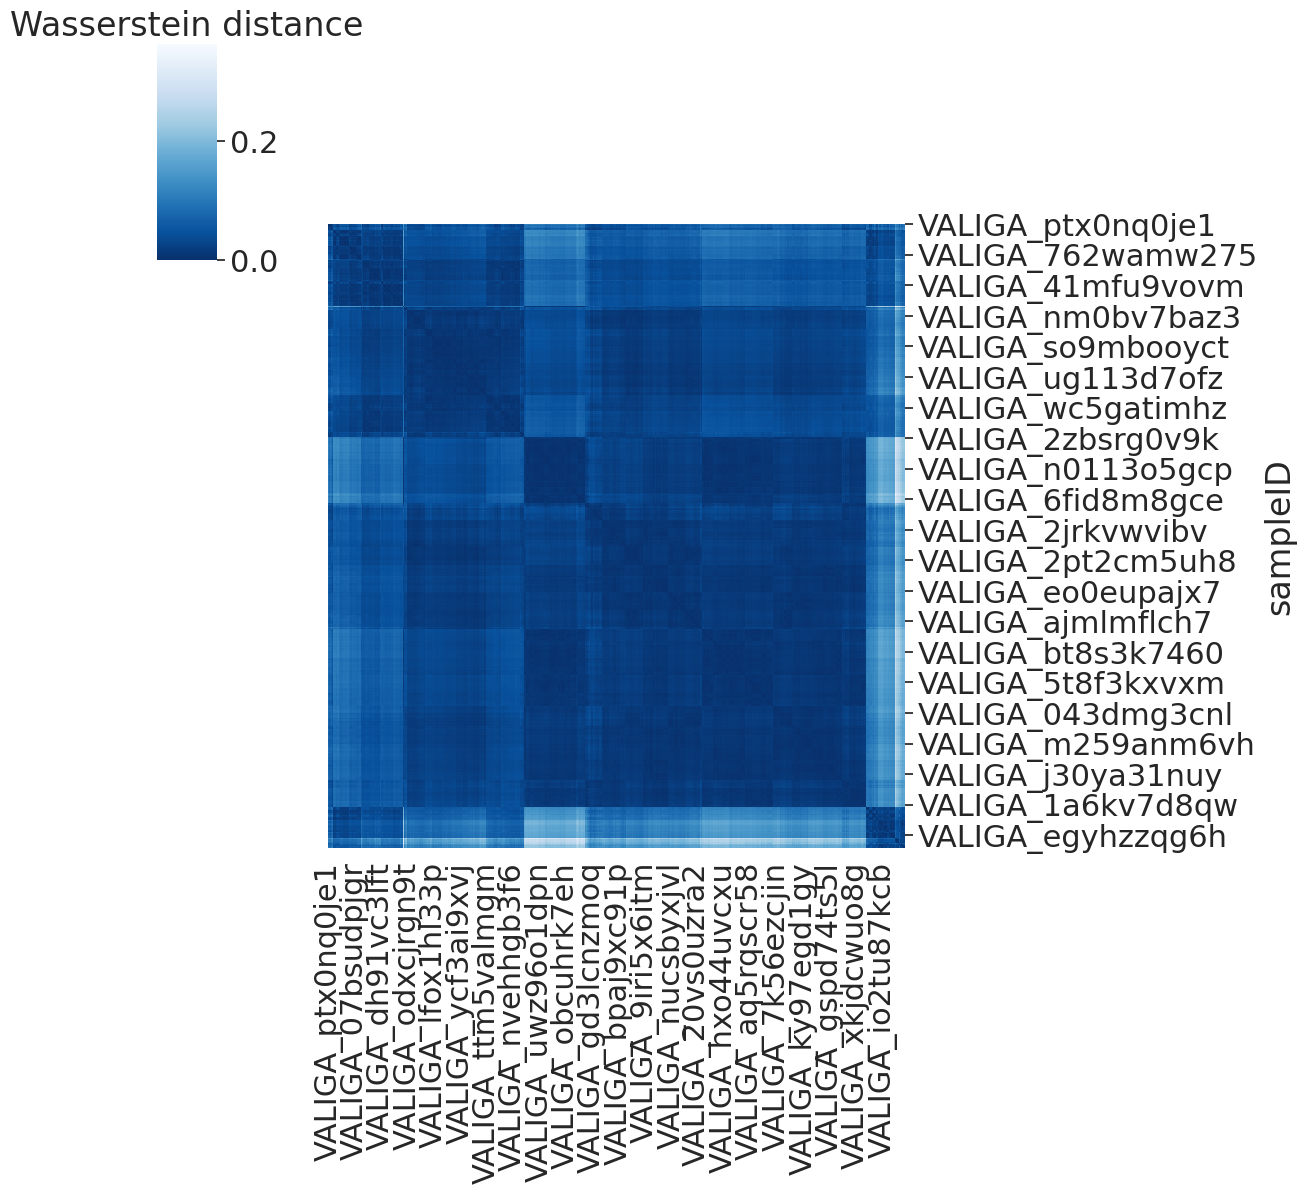

In [7]:
EMD_tubuli = wasserstein_d(proportions,cost/cost.max(),path = path_to_results)

### Evaluation and Trajectory:
<div class="alert alert-block alert-warning"> 
After getting the distances among samples with OT (EMD matrix), we apply the clustering method (Leiden, the number of clusters should be the exact number of the specific status) for calcualting ARI and Sil. Then the Trjectory is found based on EMD matrix.   
</div>

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
Cluster labels:  ['<30', '>60', '30-60']
Categories (3, object): ['30-60', '<30', '>60']
ARI:  0.5832772686271871
Silhouette score:  0.10289419385737116


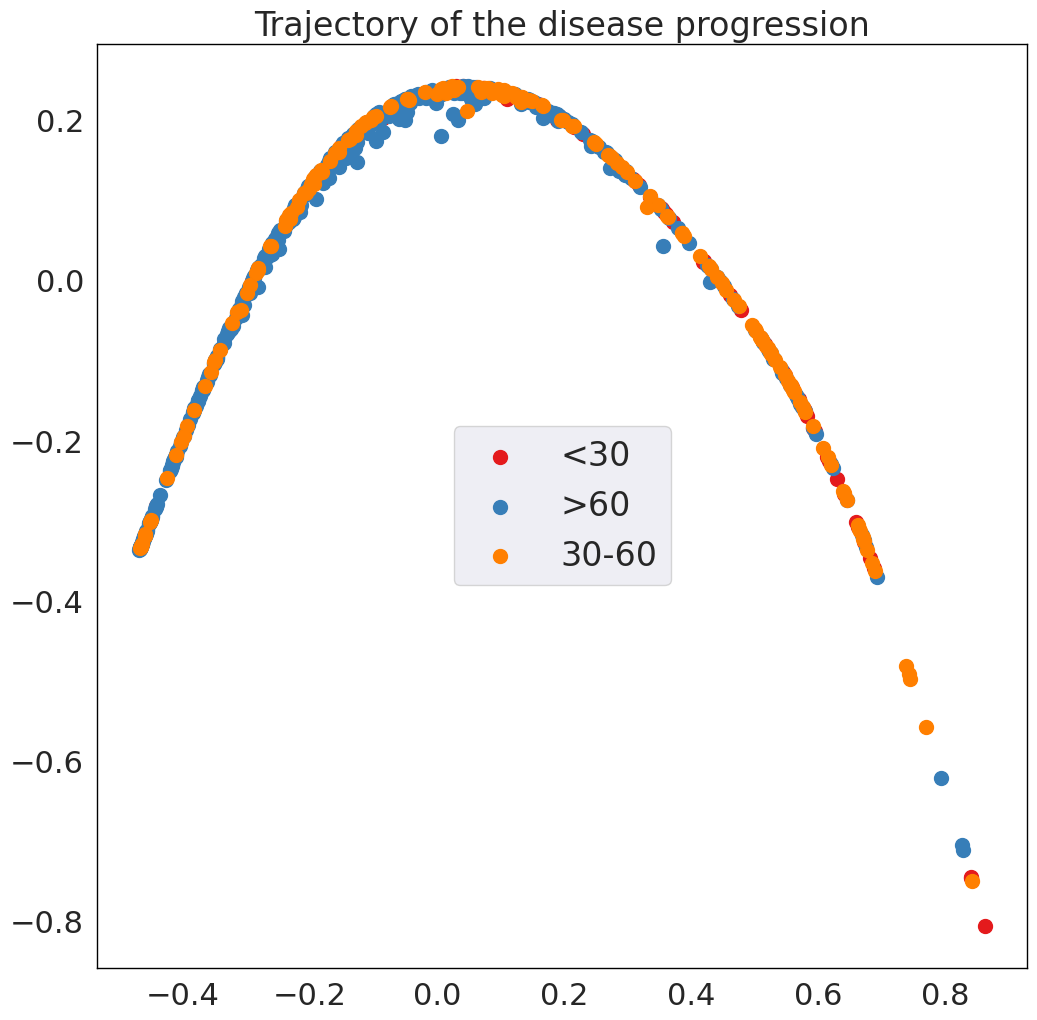

In [8]:
# Computing ARI
predicted_labels, ARI, real_labels = Clustering(EMD_tubuli/EMD_tubuli.max(), annot_tubuli)
#Computing Sil
Silhouette = Sil_computing(EMD_tubuli/EMD_tubuli.max(), real_labels)
#Drawing diffusion map
emd_tubuli=trajectory(EMD_tubuli/EMD_tubuli.max(), predicted_labels, annot_tubuli,path = path_to_results,colors=['#e41a1c','#377eb8','#ff7f00'] )

# Kidney_IgAN Glomeruli

### Reading Anndata

In [9]:

adata=load_h5ad('Datasets/Kidney_IgAN_G.h5ad')
data_glom,annot_glom,path_to_results=extract_data_anno_pathomics_from_h5ad(adata,var_names=list(adata.var_names),clusters_col='Cell_type',sample_col='sampleID',status='status' ,name_dataset='Kidney_IgAN_G')

### Cluster representations by estimating regularized probability distributions of cell types per sample:

In [10]:
proportions = Cluster_Representations(annot_glom) # Regularization

### Calcuating  cost matrix between clusters:

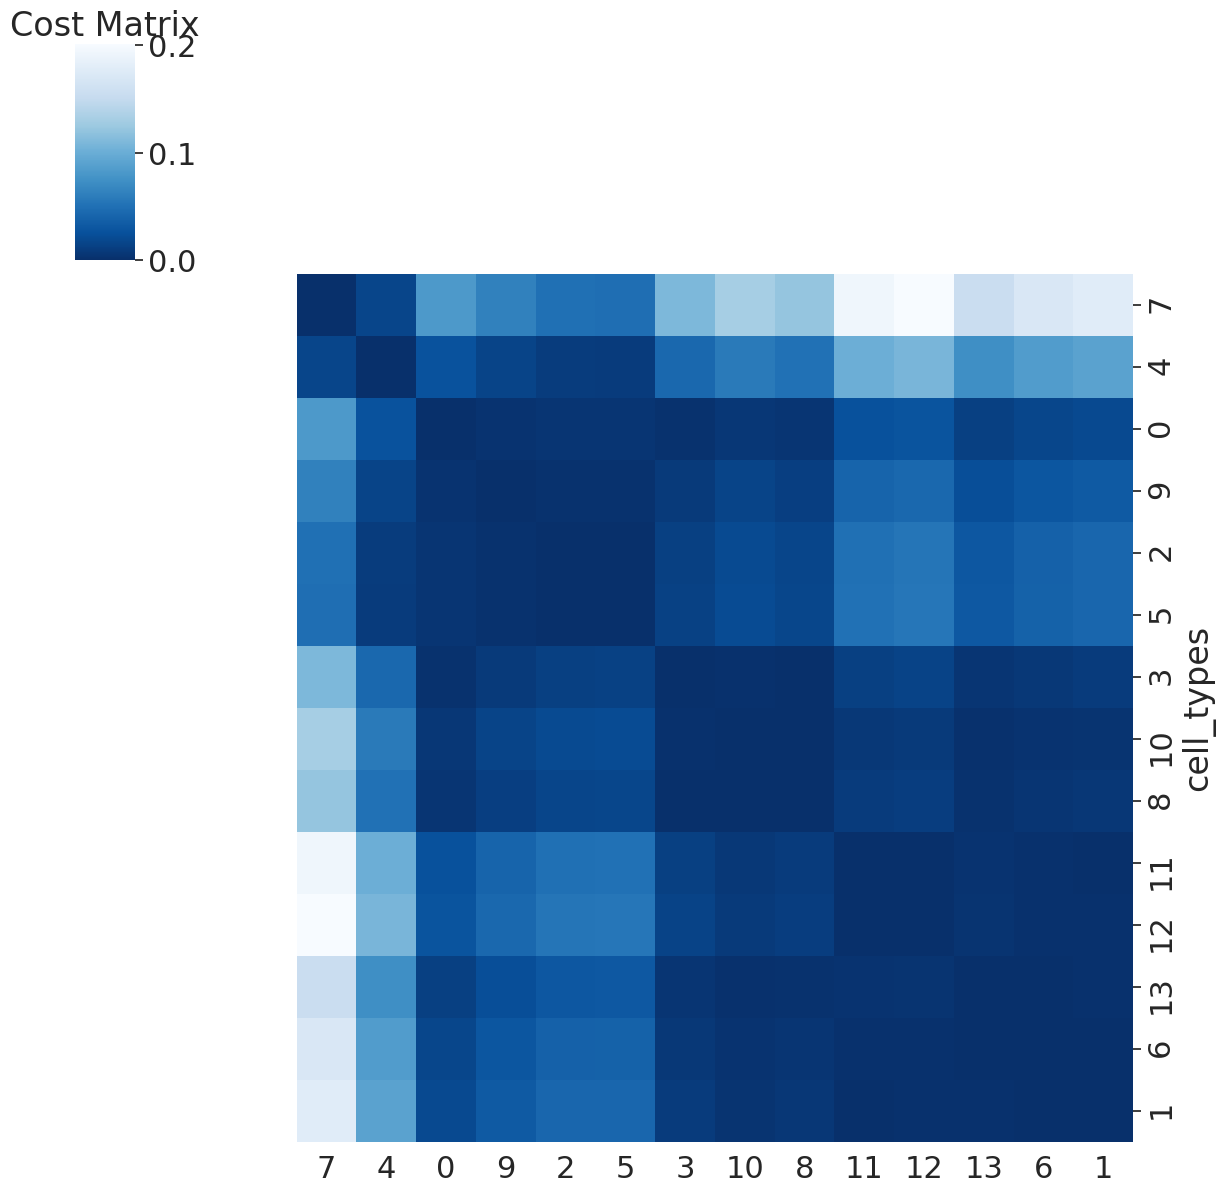

In [11]:
cost= cost_matrix(annot_glom, data_glom,path_to_results)

###  Estimate the Wasserstein distance:

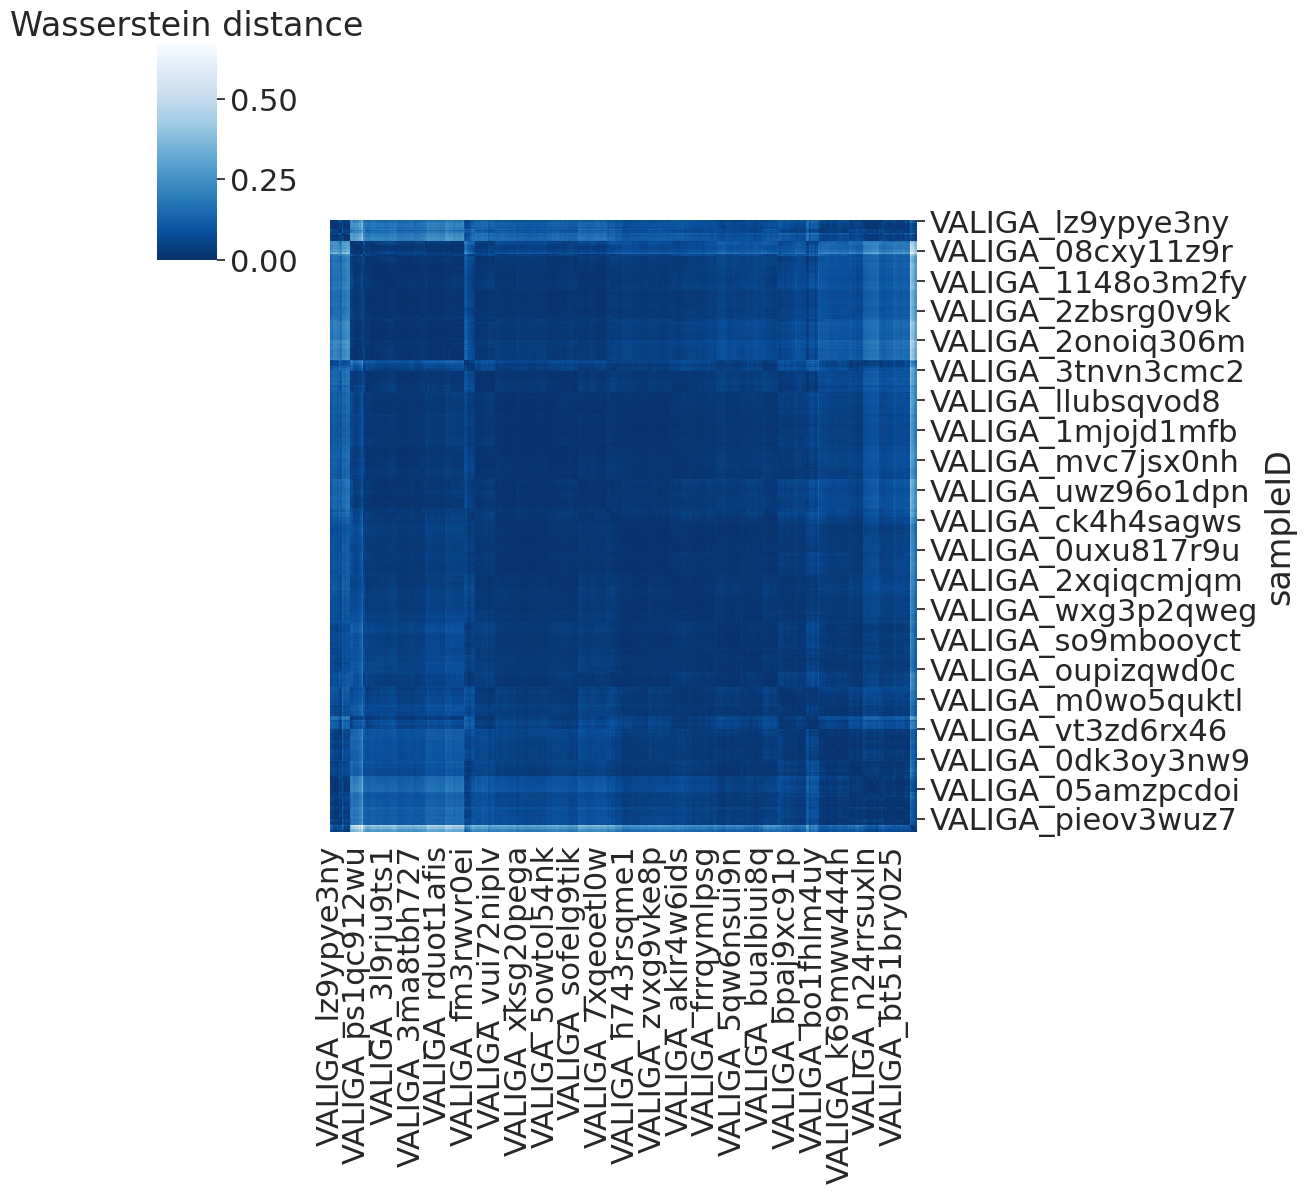

In [12]:
EMD_glom = wasserstein_d(proportions,cost/cost.max(),path = path_to_results)

### Evaluation and Trajectory

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
Cluster labels:  ['<30', '>60', '30-60']
Categories (3, object): ['30-60', '<30', '>60']
ARI:  0.5562466049705722
Silhouette score:  0.07689613590697819


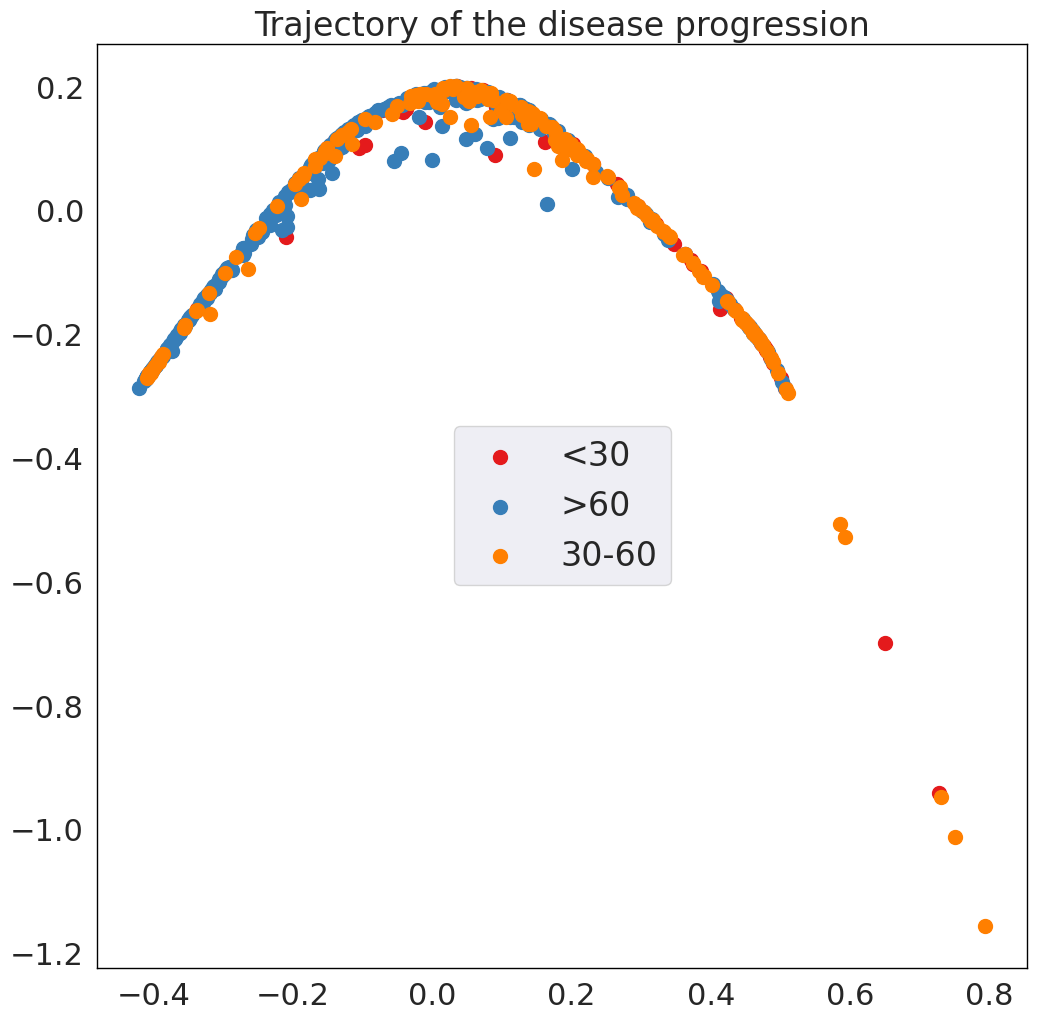

In [18]:
# Computing ARI
predicted_labels, ARI, real_labels = Clustering(EMD_glom/EMD_glom.max(), annot_glom)
#Computing Sil
Silhouette = Sil_computing(EMD_glom/EMD_glom.max(), real_labels)
#Drawing diffusion map
emd_glomeruli=trajectory(EMD_glom/EMD_glom.max(), predicted_labels, annot_glom, path = path_to_results,colors=['#e41a1c','#377eb8','#ff7f00'] )

### Combination:
<div class="alert alert-block alert-warning"> 
Here, we combine the distances of samples. We get the sum of distances of samples based on Tubuli and Glomeruli distances.   
</div>

In [19]:
EMD=EMD_tubuli+EMD_glom

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
Cluster labels:  ['<30', '>60', '30-60']
Categories (3, object): ['30-60', '<30', '>60']
ARI:  0.5339353436891074
Silhouette score:  0.10607032425383428


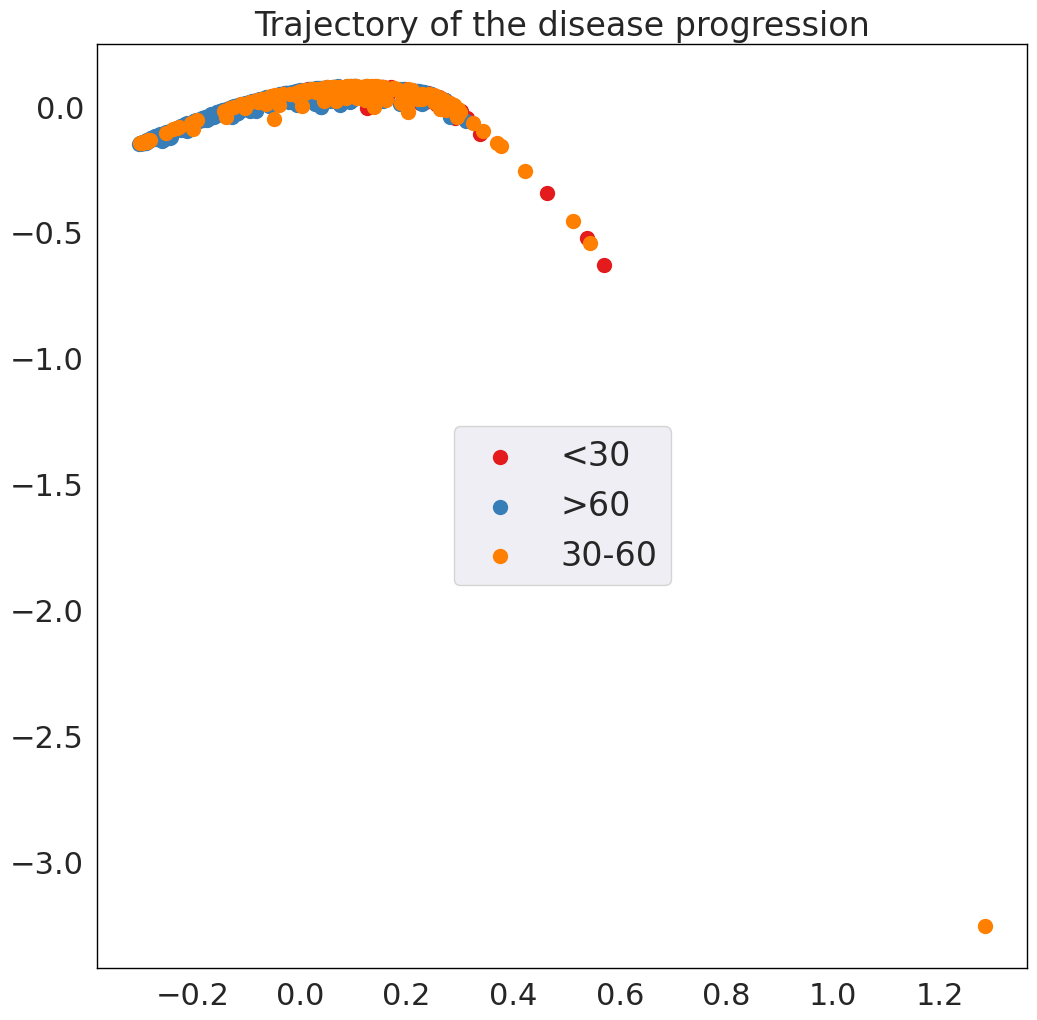

In [20]:
# Computing ARI
predicted_labels, ARI, real_labels = Clustering(EMD/EMD.max(), annot_glom)
#Computing Sil
Silhouette = Sil_computing(EMD/EMD.max(), real_labels)
#Drawing diffusion map
emd_combination=trajectory(EMD/EMD.max(), predicted_labels, annot_glom, path = path_to_results,colors=['#e41a1c','#377eb8','#ff7f00'] )

###  Fit a principal graph:
<div class="alert alert-block alert-warning"> 
Drawing the backbone of the trajectory with EIPLGraph.
Here the source_node is important to start ranking samples, simply you can choose the start point from control samples.  It also allows
us to rank samples with a disease progression score t = t1, ...,tn, where tl is the ranking of the sample n
</div>

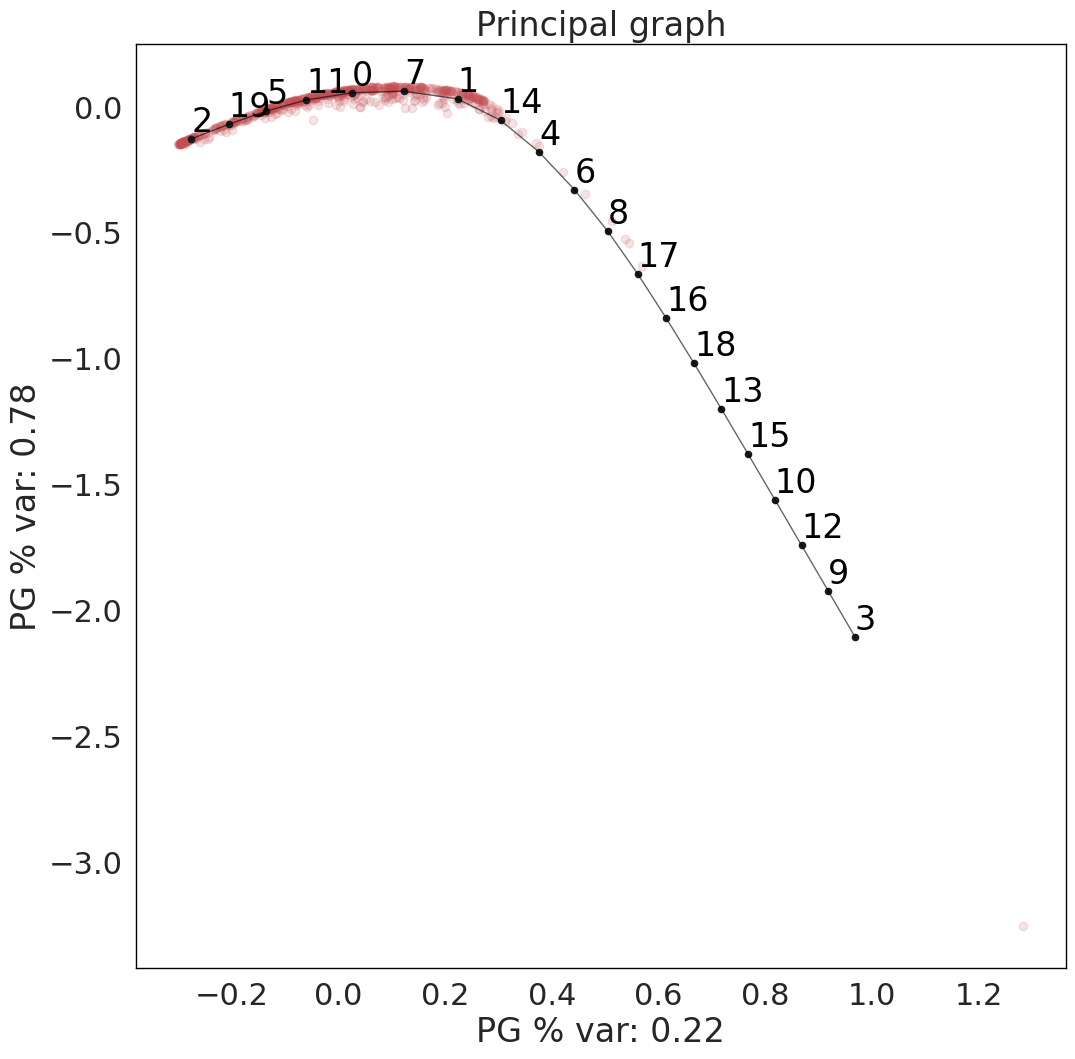

In [22]:
pseudotime=fit_pricipla_graph(emd_combination,NumNodes=20,path=path_to_results,source_node=2,show_text=True)

### Cell-type Importance Glomeruli:

* In this step we get the orders of samples

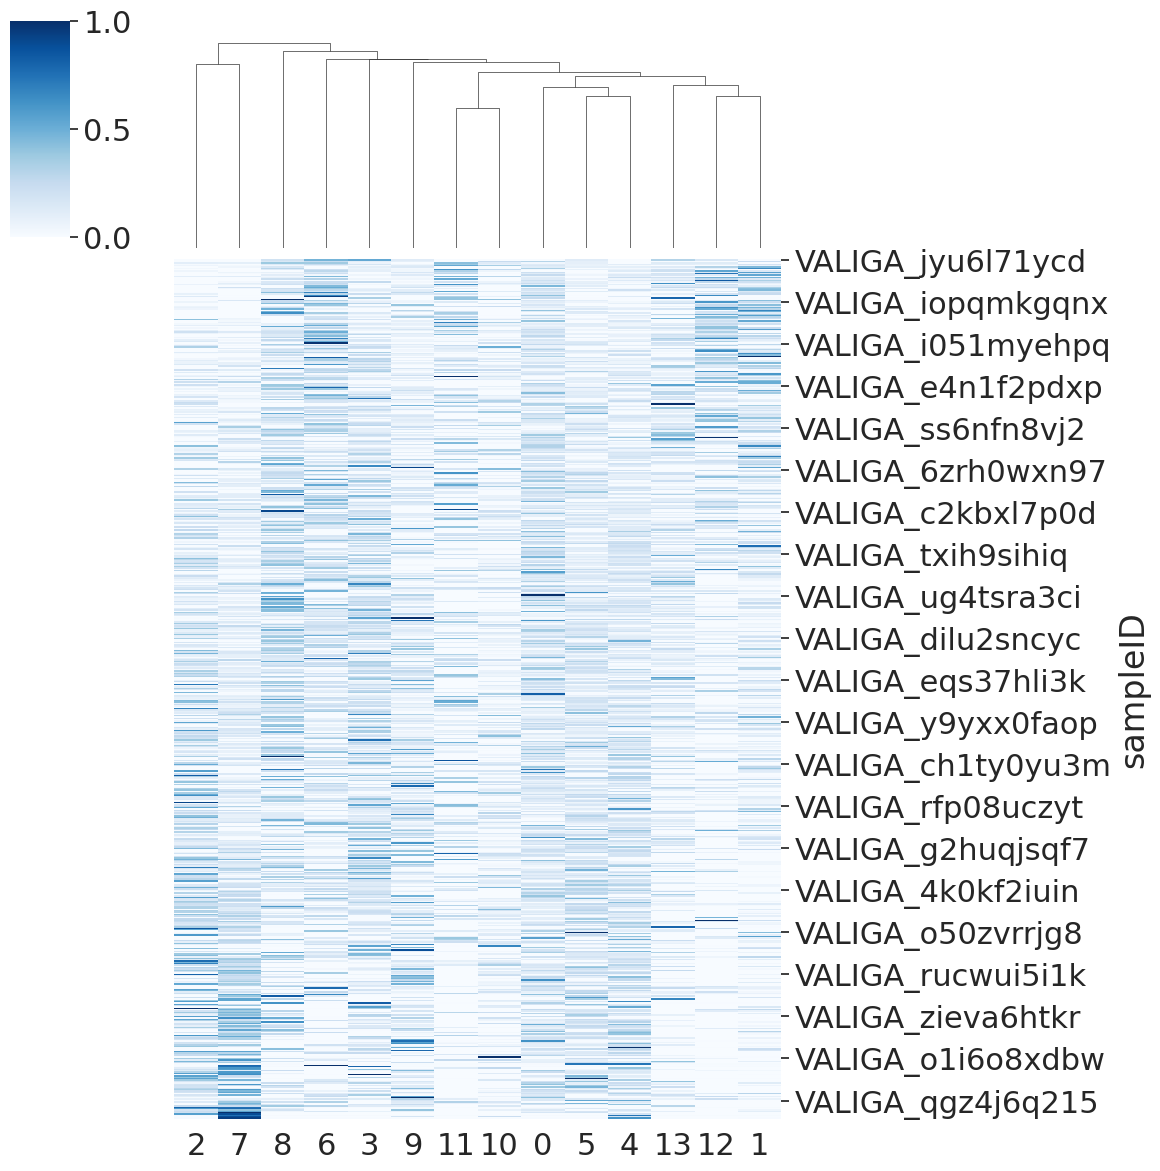

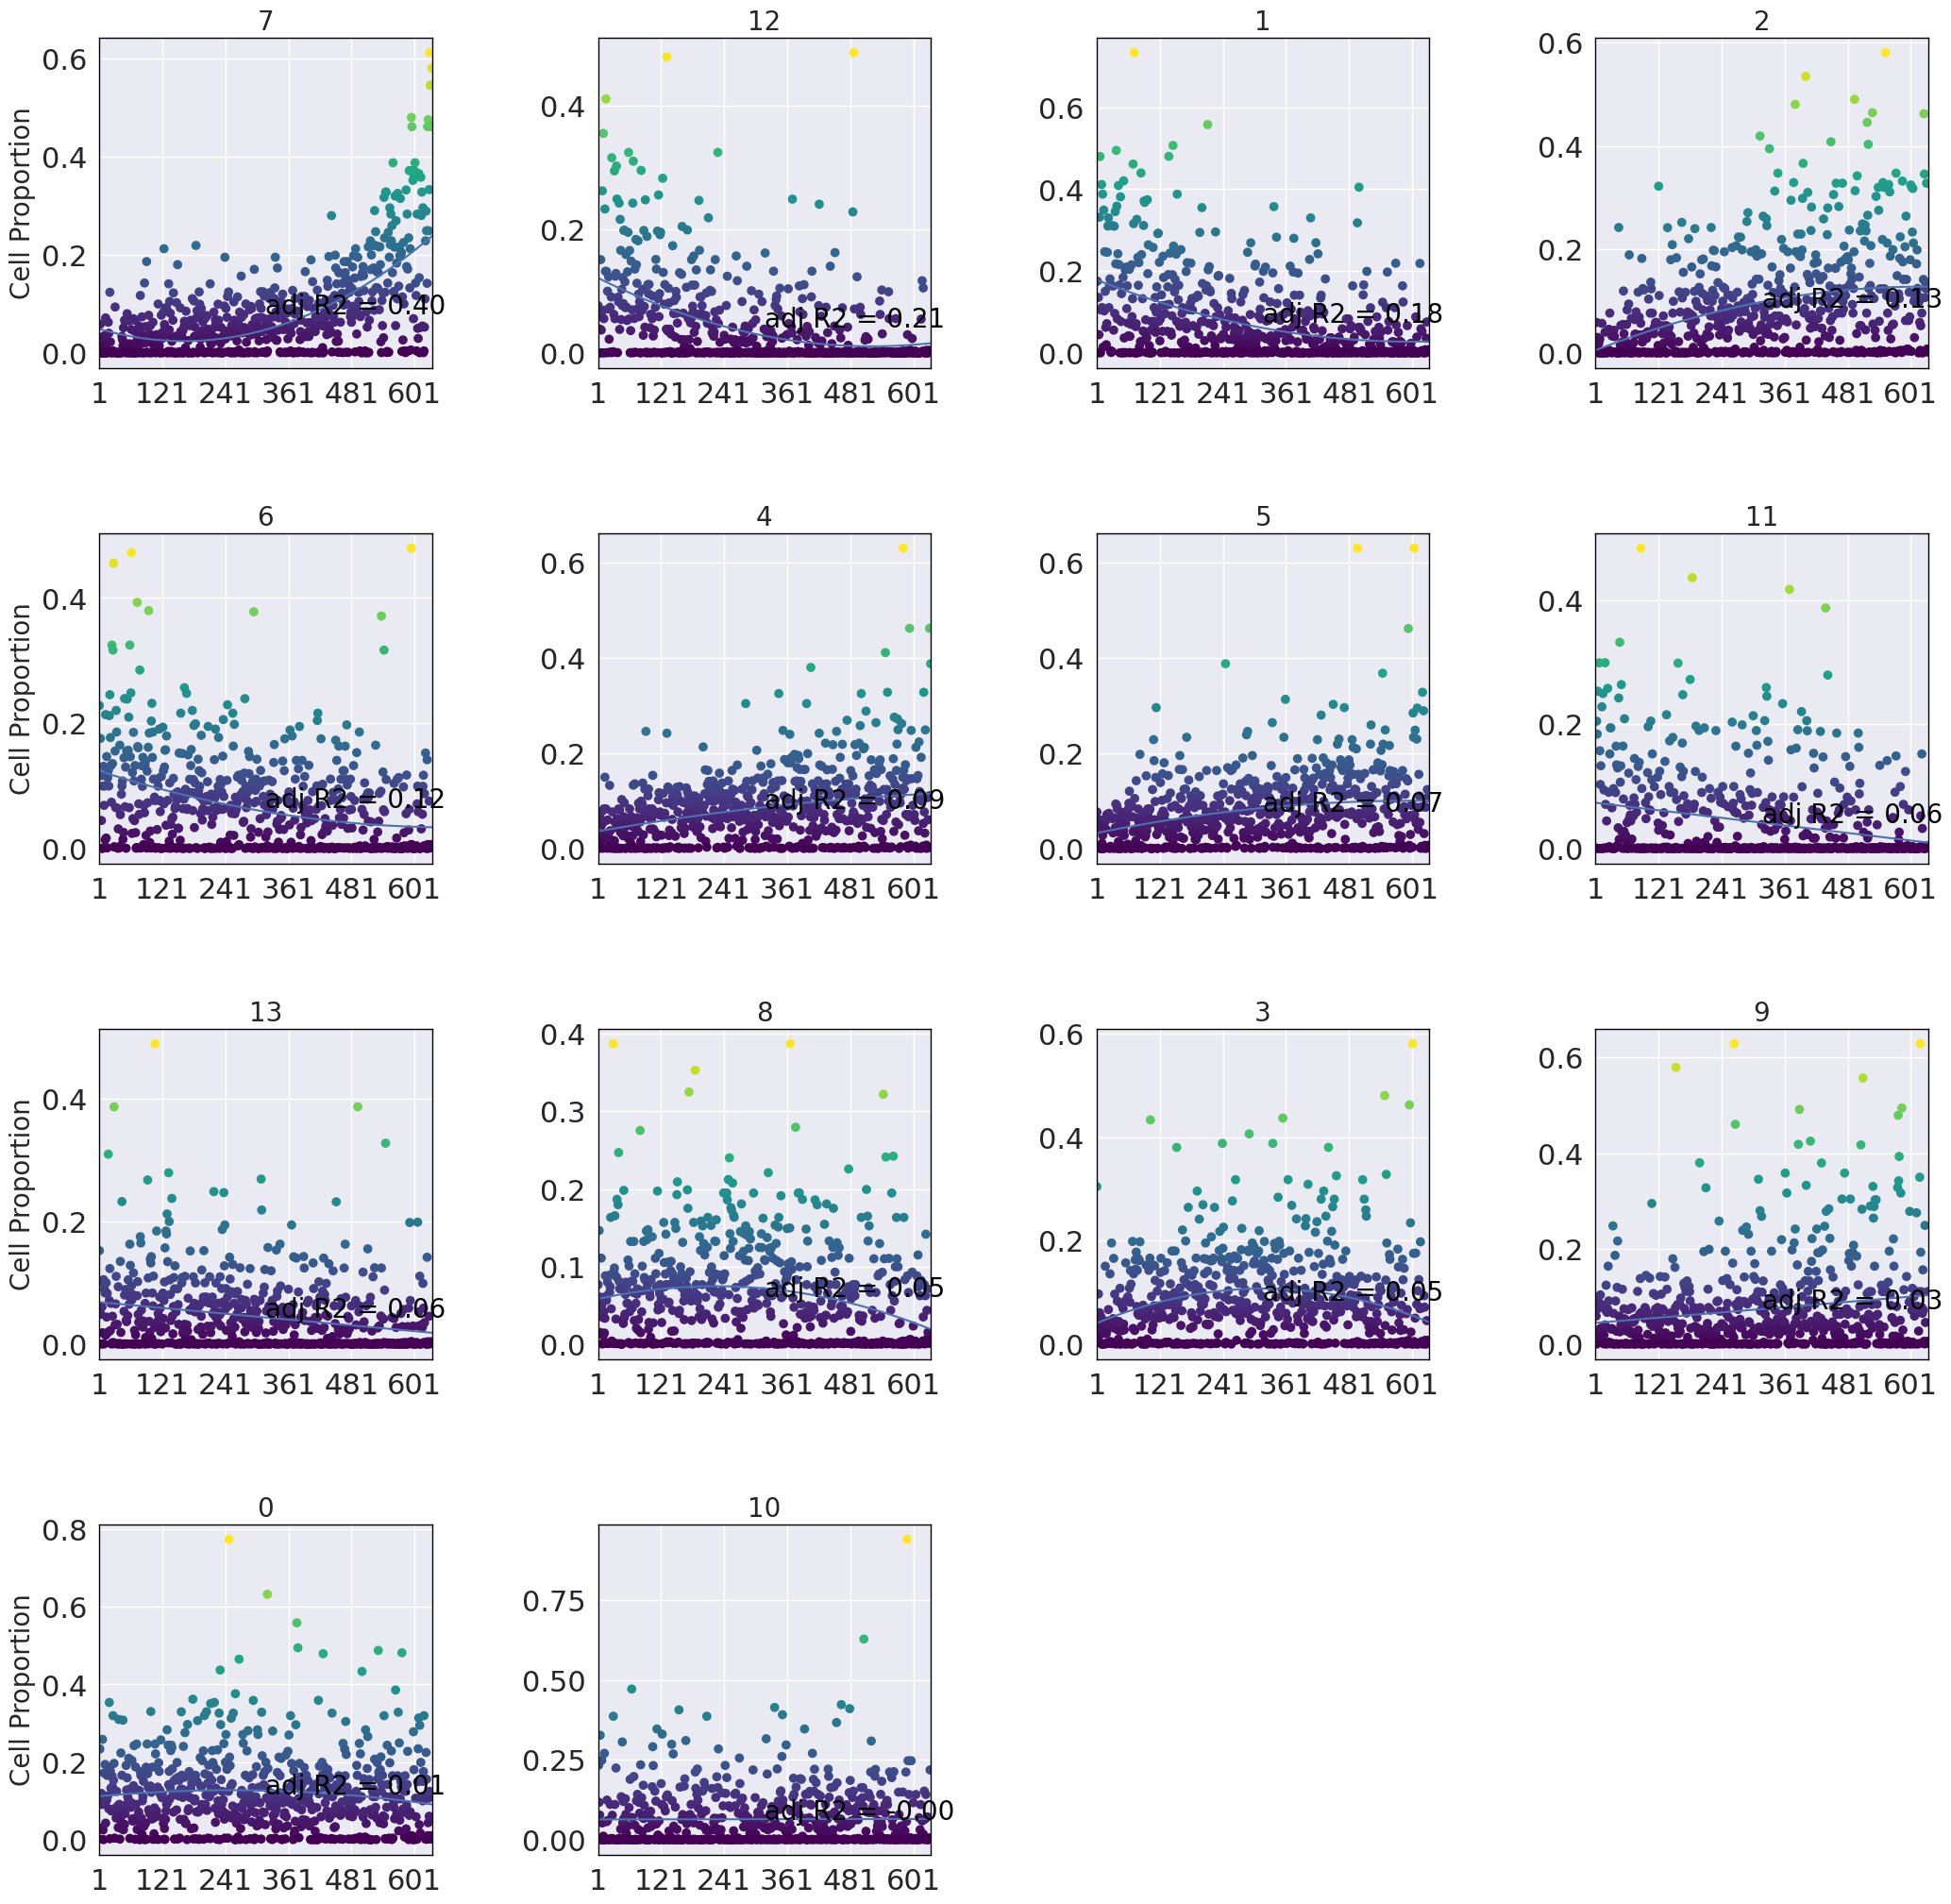

In [23]:
 #here we sum up the embeddings of Tubuli and glomeruli for next analysis

orders,cell_names=Cell_importance(proportions,annot_glom,emd_combination,real_labels,path=path_to_results,pseudotime=pseudotime,width=40,height=40,xlim=120,p_val=1)

# Feature selection for Glomeruli based on Combination:

### Saving morphological features and map them with the obtained order by PILOT  (for Glomeruli):

<div class="alert alert-block alert-warning"> 
This step extracts features associated with all clusters and map them with the obtained time by PILOT (based on the Trjaectory order of Samples).
    
    
* The function "extract_cells_from_pathomics"  automatically creates a cells folder and put the extracted features associate with cells and obtained time by PILOT(orders).
</div>

In [24]:
extract_cells_from_pathomics(orders=orders,annot=annot_glom,data=data_glom,path=path_to_results)

### Morphological Feature Feature selection for Glomeruli:

<div class="alert alert-block alert-warning">
   
* Check the Results_PILOT/data_set name folder for saved results after finishing this part. 
 We get the log scale of some features and then apply the genes_importance function to catch the features/structures that are changing over the trajectory(combination) for Glomeruli.
</div>

Name of Cell type : All
sparsity:6.486269746268921e-05
For this cell_type, p-value of  14 genes are statistically significant.
  Expression pattern  count
0        linear down      6
1          linear up      4
2     quadratic down      2
3       quadratic up      2
data saved successfully


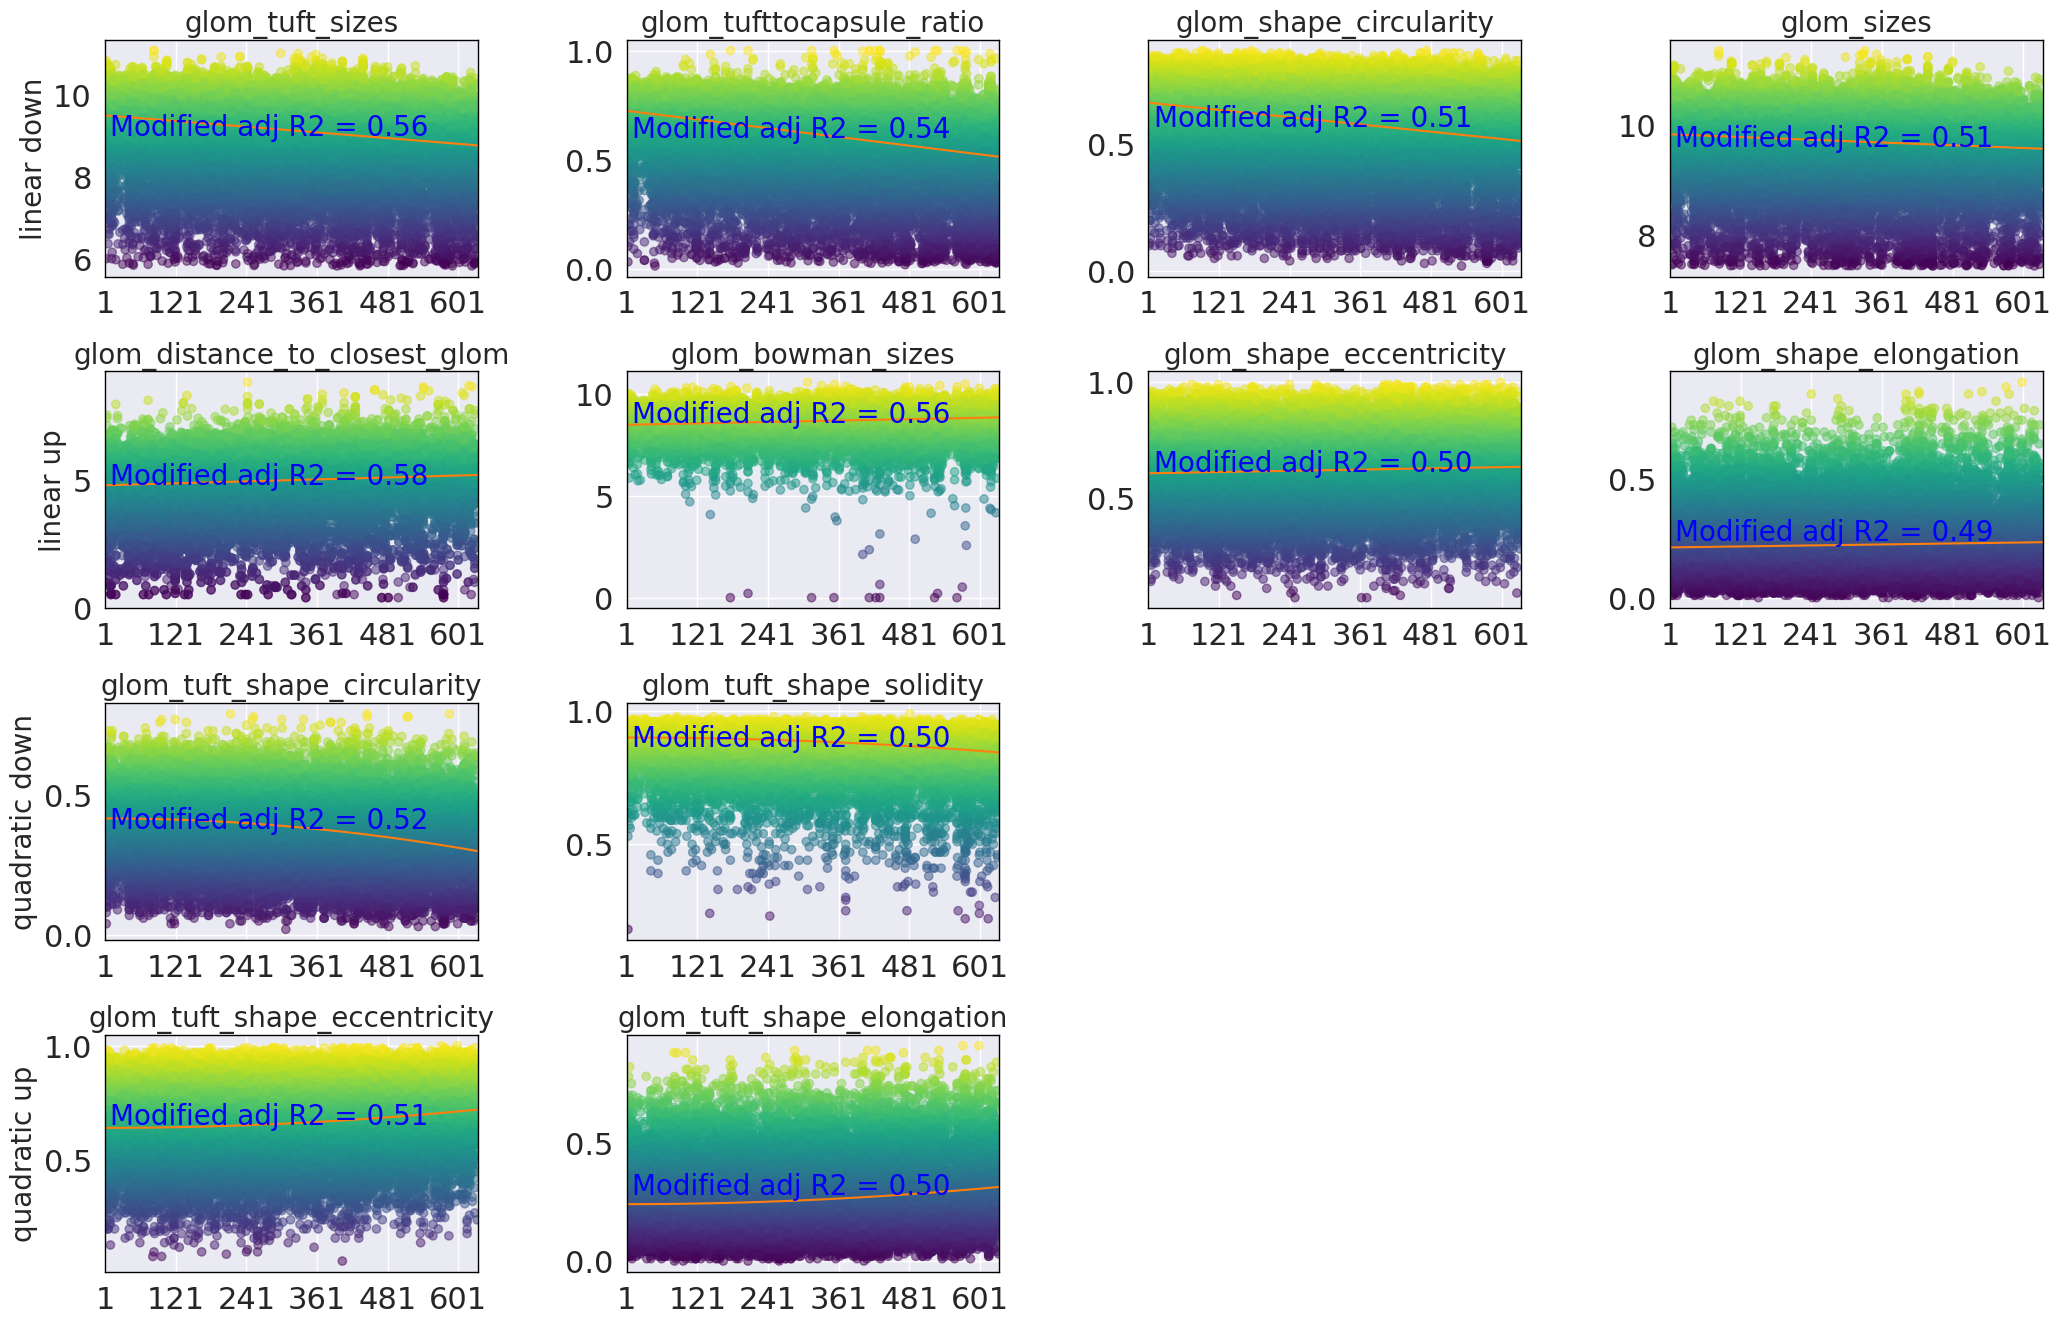

In [25]:
cell_n='All'
data =loadTarget(path_to_results+'/cells/', cell_n)
colss=['glom_sizes',
 'glom_distance_to_closest_glom',
 'glom_diameters',
 'glom_tuft_sizes',
 'glom_bowman_sizes']
for col in colss:
    data[col]=np.log(data[col]+1)
pro=cal_proportions(data)
genes_importance(pro,data,path=path_to_results,name_cell=cell_n,col='Time_score',genes_index=list(range(0, 14)),p_value=0.05,max_iter_huber=500,epsilon_huber=1.35,x_lim=120,store_data=1,modify_r2=True)

# Feature slection for Tubuli based on Combination

### Saving morphological features and map them with the obtained order by PILOT  (for Tubuli):


In [26]:
extract_cells_from_pathomics(orders=orders,annot=annot_tubuli,data=data_tubuli,path='Results_PILOT/Kidney_IgAN_T')

###  Morphological Feature selection for Tubuli

Name of Cell type : All
sparsity:0.0
For this cell_type, p-value of  3 genes are statistically significant.
  Expression pattern  count
0        linear down      2
1          linear up      1
data saved successfully


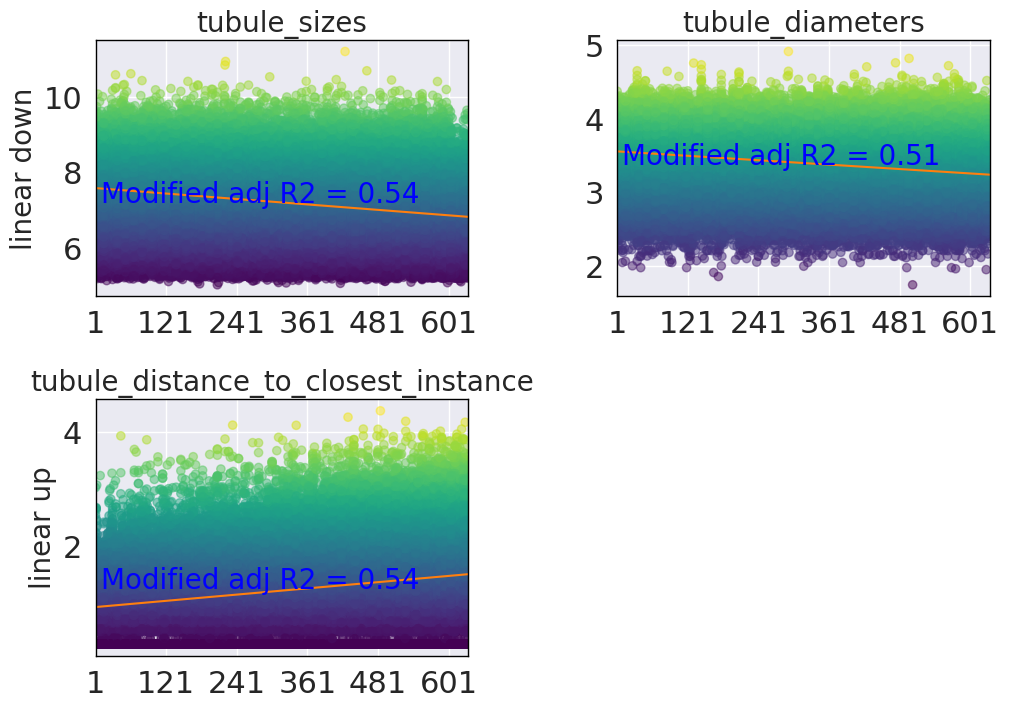

In [27]:
cell_n='All'
data =loadTarget('Results_PILOT/Kidney_IgAN_T/cells/', cell_n)
colss=['tubule_diameters',
 'tubule_sizes',
 'tubule_distance_to_closest_instance']
for col in colss:
    data[col]=np.log(data[col]+1)
pro=cal_proportions(data)
genes_importance(pro,data,path=path_to_results,name_cell=cell_n,col='Time_score',genes_index=list(range(0, 3)),p_value=0.01,max_iter_huber=500,epsilon_huber=1.35,x_lim=120,store_data=1,modify_r2=True)